<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/end%20to%20end%20modelling_deep%20learning/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import datetime
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# TensorBoard setup
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 43ms/step - accuracy: 0.2857 - loss: 1.9171 - val_accuracy: 0.5330 - val_loss: 1.3626
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.4845 - loss: 1.4271 - val_accuracy: 0.5864 - val_loss: 1.2017
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.5386 - loss: 1.2869 - val_accuracy: 0.6186 - val_loss: 1.1030
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.5772 - loss: 1.1866 - val_accuracy: 0.6506 - val_loss: 1.0086
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.5998 - loss: 1.1257 - val_accuracy: 0.6543 - val_loss: 1.0063
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6182 - loss: 1.0748 - val_accuracy: 0.6572 - val_loss: 0.9762
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.6336 - loss: 1.0303 - val_accuracy: 0.6725 - val_loss: 0.9509
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.6466 -

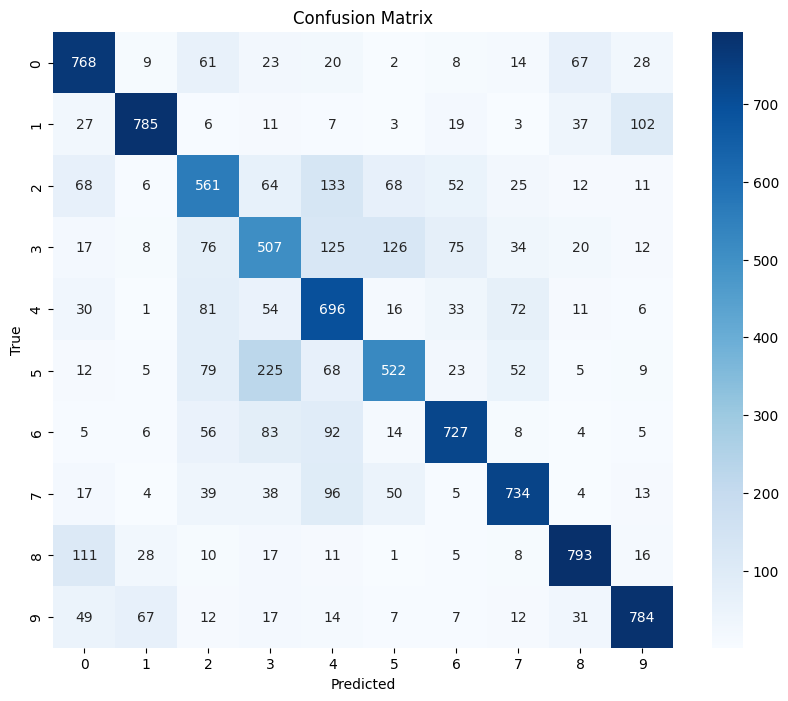

In [5]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

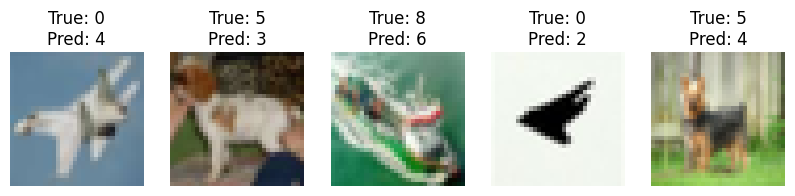

In [6]:
# Display sample misclassified images
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0][:5]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.show()

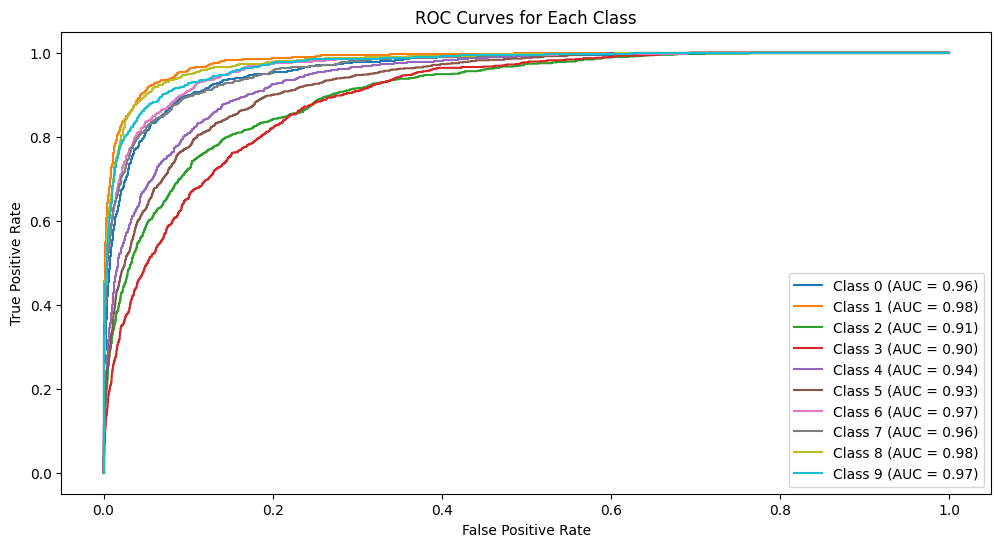

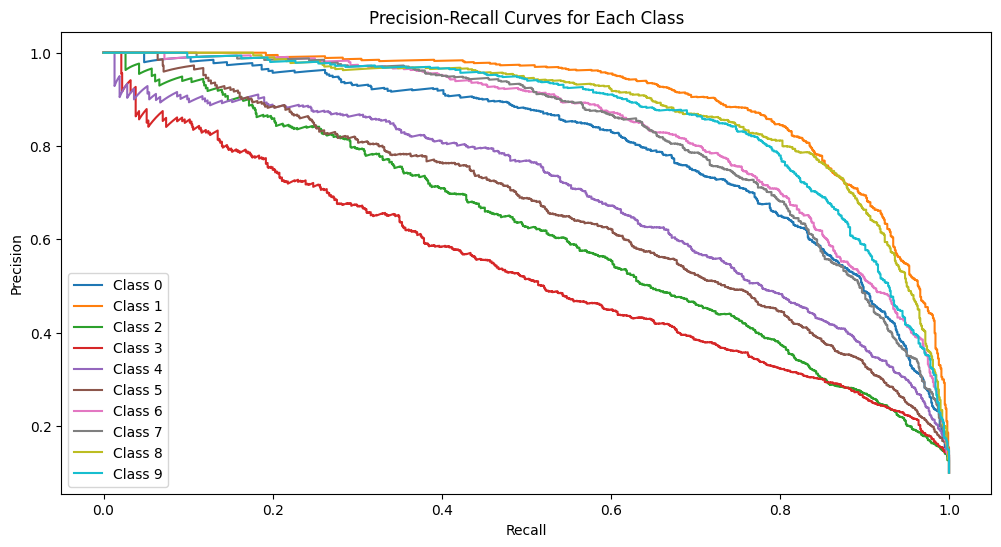

In [9]:
# Compute and plot ROC and PR curves for each class
plt.figure(figsize=(12, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(10):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend()
plt.show()